# Home Credit Risk Modeling(Grp)

## Table of Contents
## 1. [Introduction](#Introduction)
## 2. [Business Problem](#BP)
## 3. [Data Preparation](#DP)
## 4. [Data Modeling](#DM)
## 5. [Result](#Result)
## 6. [Conclusion](#C)
## 7. [Group Contribution](#GC)



# Introduction<a id="Introduction"></a>

Home Credit is a global financial institution that helps to improve financial inclusion for individuals who have limited credit history. Through the utilization of alternative data sources like telco and transactional information, their goal is to provide easily accessible financial services to those who are underserved by traditional banking. 
Home Credit's approach is characterized by advanced risk management models and a lending process that prioritizes customers' needs. This allows them to offer loans to individuals who may not qualify for traditional bank loans, promoting the development of a strong credit history for our clients. 
The objective is to enhance their prediction models to more accurately evaluate a client's loan repayment capacity, thereby guaranteeing that deserving applicants are granted loans with terms that support their success. 

# Business Problem & Purpose of Notebook<a id="BP"></a>

Our aim is to optimize Home Credit's impact by enhancing data analysis practices and utilizing advanced algorithms to effectively identify individuals with a high likelihood of loan repayment. This approach strives to minimize unreasonable loan denials, enhance the precision of loan rejections, and provide credit to deserving applicants. Through the incorporation of advanced analytics, this project aims to provide a highly accurate predictive model. It will utilize a range of statistical and machine learning methods to ensure accurate loan repayment predictions.

The purpose of this notebook is to create a predictive model that outperforms a set benchmark. The aim is to address the main business challenge faced by Home Credit, which is to provide financial services to individuals who are typically overlooked due to their limited or nonexistent credit history. This model aims to improve loan approval processes by accurately identifying applicants who are more likely to repay loans. This will help increase financial inclusion, minimize unfair loan rejections, and reduce incorrect rejections.

## Loading the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Importing data

In [2]:
#reading the csv files 
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
b_balanced = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
cc_balance = pd.read_csv('credit_card_balance.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')
prev_app = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

## Exploring the Data

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
b_balanced.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [9]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Data Preparation <a id="DP"></a>

#### Feature Engineering, Handlings of NA and variable transformation

### Feature Engineering

We will now combine the historical data with the current application data to enhance the creation of more comprehensive features for predictive modeling. By including the count of previous applications and past credits in the training and testing datasets, the model can make more accurate predictions on loan repayment probabilities.

In [11]:
#count of previous applications per applicant
prev_app_count = prev_app.groupby('SK_ID_CURR').size().reset_index(name = 'PREV_APP_COUNT')

#count of past credits per applicant
bureau_cc = bureau.groupby('SK_ID_CURR').size().reset_index(name = 'BUREAU_CREDIT_COUNT')

#merging the derived values with application train and test data
app_train = app_train.merge(prev_app_count, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_cc, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(prev_app_count, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_cc, on = 'SK_ID_CURR', how = 'left')

#filling the missing values with 0
app_train['PREV_APP_COUNT'] = app_train['PREV_APP_COUNT'].fillna(0)
app_train['BUREAU_CREDIT_COUNT'] = app_train['BUREAU_CREDIT_COUNT'].fillna(0)

app_test['PREV_APP_COUNT'] = app_test['PREV_APP_COUNT'].fillna(0)
app_test['BUREAU_CREDIT_COUNT'] = app_test['BUREAU_CREDIT_COUNT'].fillna(0)

#first 10 rows
print(app_train.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

### Exploring the Target Variable

In [12]:
#calculating the number of the TARGET variables that are 0 or 1 using value_counts()
majority = app_train['TARGET'].value_counts()
majority_count = pd.DataFrame({'Labels': majority.index,
                               'Values': majority.values})
majority_count.set_index('Labels', inplace = True)
majority_count

,Values
Labels,
0,282686
1,24825


### Plotting the majority class classifier

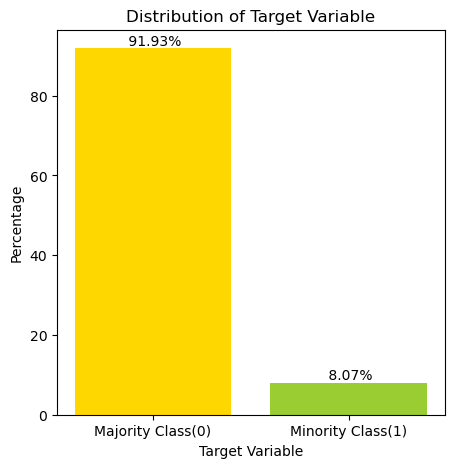

In [13]:
#calculating the percentage of 0 and 1 in TARGET
total = majority_count['Values'].sum()
percentage = majority_count['Values'] / total * 100

#storing the index as labels
labels = majority_count.index

#plotting the Distribution of the TARGET variable
plt.figure(figsize = (5,5))
bars = plt.bar(labels, percentage, color = ['gold', 'yellowgreen'])
plt.xlabel('Target Variable')
plt.ylabel('Percentage')
plt.xticks(labels,['Majority Class(0)', 'Minority Class(1)'])

#to print the data labels on top of the bars
for bar, percent in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{percent: .2f}%', ha = 'center', va = 'bottom')

plt.title('Distribution of Target Variable')
plt.show()

The majority class (0) with 91.93% states that the number of no defaulter are higher than defaulter (1) with 8.07%.

### Distribution of Occupation Type

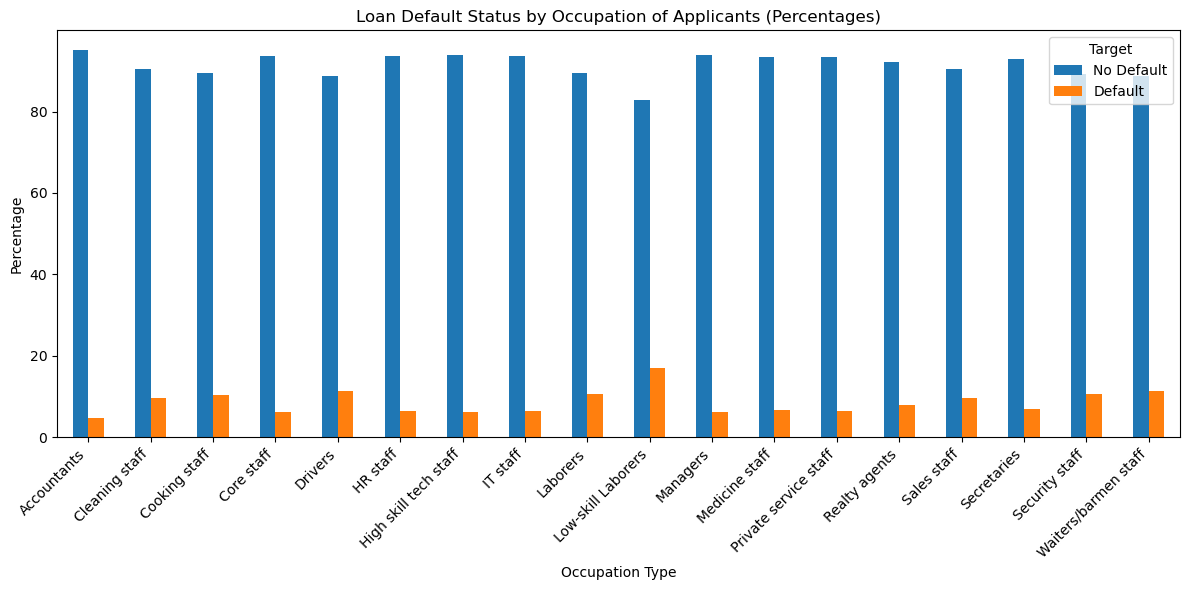

In [14]:
#creating a pivot table with counts
pivot_data = app_train.pivot_table(index = 'OCCUPATION_TYPE', columns = 'TARGET', aggfunc = 'size', fill_value = 0)

#calculating percentages
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis = 1), axis = 0) * 100

#plotting the distribution of occupation type
pivot_data_percentage.plot(kind = 'bar', figsize = (12,6))
plt.xlabel('Occupation Type')
plt.ylabel('Percentage')
plt.title('Loan Default Status by Occupation of Applicants (Percentages)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

### Distribution of AMT_GOODS_PRICE

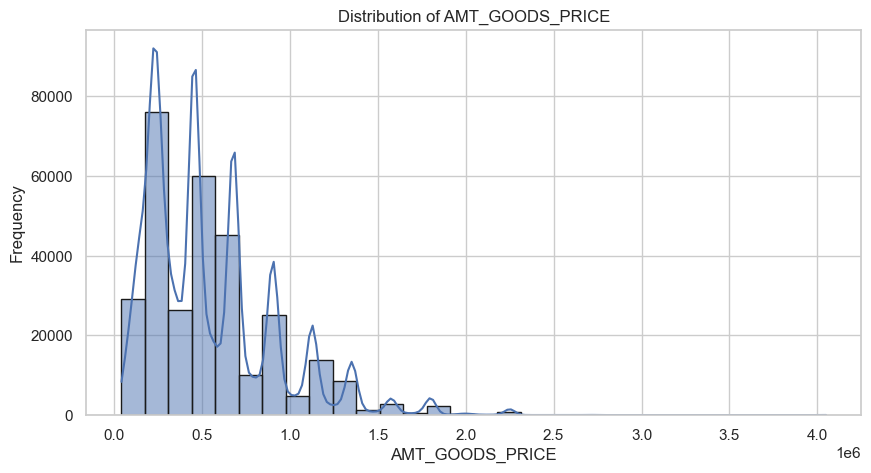

In [15]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
plt.title("Distribution of AMT_GOODS_PRICE")
sns.histplot(app_train["AMT_GOODS_PRICE"].dropna(), kde=True, bins=30, edgecolor='k')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.show()

### Distribution of AMT_ANNUITY

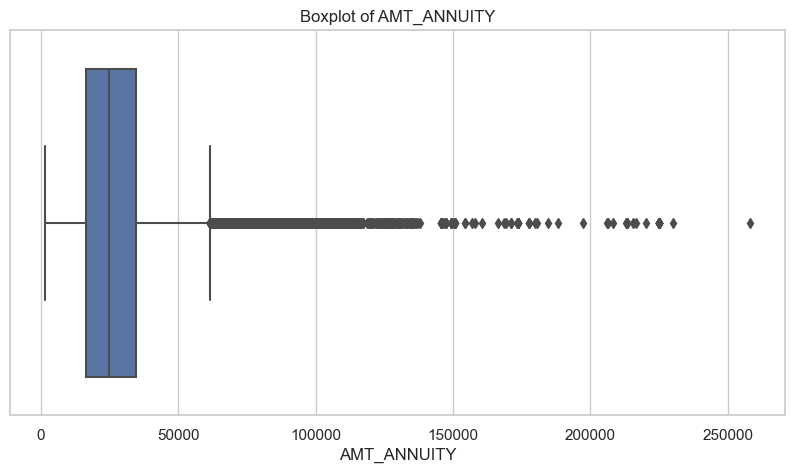

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.title("Boxplot of AMT_ANNUITY")
sns.boxplot(x=app_train["AMT_ANNUITY"])
plt.xlabel('AMT_ANNUITY')
plt.show()

Our dataset contains a vast range of information, with some columns fully populated and others having a significant number of missing entries. However, it is crucial that we tackle the concerns regarding missing values and outliers in multiple columns to improve the accuracy and dependability of our predictive model.


### Correlation Between Numeric Columns

In [17]:
numeric = app_train.select_dtypes(include = [np.number]).columns
correlations = app_train[numeric].corr()['TARGET'].sort_values()
print("Most positive correlations:\n", correlations.tail(10))
print("Most negative correlations:\n", correlations.head(10))

Most positive correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most negative correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


The output suggests that certain variables, like DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, and different FLAG_DOCUMENT and REG_CITY features, exhibit a positive correlation with the target. It appears that certain factors, such as age, regional client ratings, and specific document flags, may be linked to a higher likelihood of default. In contrast, features such as EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, and DAYS_EMPLOYED show significant negative correlations. This suggests that higher external source ratings and longer employment durations are associated with a reduced likelihood of loan default.

## Data Cleaning <a id="DC"></a>

### Looking into the missing Data

In [18]:
#counting the missing values and listing its percentage
app_train_copy = app_train.copy()
app_test_copy = app_test.copy()

missing_count = app_train_copy.isnull().sum()
missing_percentage = round((app_train_copy.isnull().mean() * 100), 2)

#creating a dataframe to store the same
missing_table = pd.DataFrame({'Missing Values': missing_count, 'Percentage': missing_percentage})
missing_table = missing_table.sort_values('Missing Values', ascending = False)

#printing the head of the missing table
print(missing_table.head(60))

                              Missing Values  Percentage
COMMONAREA_MODE                       214865       69.87
COMMONAREA_AVG                        214865       69.87
COMMONAREA_MEDI                       214865       69.87
NONLIVINGAPARTMENTS_MEDI              213514       69.43
NONLIVINGAPARTMENTS_AVG               213514       69.43
NONLIVINGAPARTMENTS_MODE              213514       69.43
FONDKAPREMONT_MODE                    210295       68.39
LIVINGAPARTMENTS_MEDI                 210199       68.35
LIVINGAPARTMENTS_AVG                  210199       68.35
LIVINGAPARTMENTS_MODE                 210199       68.35
FLOORSMIN_MEDI                        208642       67.85
FLOORSMIN_AVG                         208642       67.85
FLOORSMIN_MODE                        208642       67.85
YEARS_BUILD_AVG                       204488       66.50
YEARS_BUILD_MODE                      204488       66.50
YEARS_BUILD_MEDI                      204488       66.50
OWN_CAR_AGE                    

In [19]:
#dropping the columns with more than 50% missing values except for 'OWN_CAR_AGE'
columns_drop = missing_percentage[missing_percentage > 50].index
columns_drop = [col for col in columns_drop if col != 'OWN_CAR_AGE']
app_train_copy = app_train_copy.drop(columns=columns_drop)
app_test_copy = app_test_copy.drop(columns=columns_drop)

### Imputing the missing data

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#seprating the numeric and categorical columns
numeric_col = app_train_copy.select_dtypes(include = 'number').columns
categorical_col = app_train_copy.select_dtypes(include='object').columns

numeric_col_test = app_test_copy.select_dtypes(include = 'number').columns
categorical_col_test = app_test_copy.select_dtypes(include='object').columns

#defining a pipeline for numeric columns
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median'))])

#defining a pipeline for categorical columns
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent'))])

#applying the pipeline to impute the missing values
app_train_copy[numeric_col] = num_pipeline.fit_transform(app_train_copy[numeric_col])
app_train_copy[categorical_col] = cat_pipeline.fit_transform(app_train_copy[categorical_col])

app_test_copy[numeric_col_test] = num_pipeline.fit_transform(app_test_copy[numeric_col_test])
app_test_copy[categorical_col_test] = cat_pipeline.fit_transform(app_test_copy[categorical_col_test])

### Categorical Variables Encoding

In [21]:
#identifying the categorical columns
categorical_col = app_train_copy.select_dtypes(include=['object']).columns

for col in categorical_col:
    app_train_copy[col] = pd.factorize(app_train_copy[col])[0]
    app_test_copy[col] = pd.factorize(app_test_copy[col])[0]

In [22]:
print(app_test_copy.shape)
print(app_train_copy.shape)

(48744, 83)
(307511, 84)


There are several important steps involved in data preprocessing. We have handled the missing data, imputed values, and encoded categorical variables within the app_train_copy and app_test_copy datasets.Firstly, we have computed the percentage of missing values for each column and dropped the columns with over 50% of missing data, except for the 'OWN_CAR_AGE' column.

After dropping with over 50% of missing data, we have applied imputation strategies to fill in missing data. Numeric columns are filled with median values, while categorical columns are filled with the most frequent values.

Finally, it transforms categorical variables into numerical values, ensuring that the datasets are suitable for further analysis and modeling.

## Data Modeling <a id="DM"></a>

### Regression Model without the Normalised data

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#separating the target variable
X = app_train_copy.drop('TARGET', axis = 1)
Y = app_train_copy.TARGET

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 30, random_state = 0, stratify = Y)

#building the logistic regression model
log_model = LogisticRegression()

#fiiting the model into the train set
log_model.fit(X_train, Y_train)

#predicting the target variable
pred = log_model.predict(X_test)

#evaluating the model performance
acc = accuracy_score(Y_test, pred)
print("Accuracy:", acc)

AR = roc_auc_score(Y_test, log_model.predict_proba(X_test)[:, 1]).round(4)
print("AUC_ROC:", AR)

Accuracy: 0.9333333333333333
AUC_ROC: 0.4286


The output shows that the logistic regression model achieved an accuracy of around 93.3%, indicating a strong level of overall correctness in predicting the target variable. On the other hand, the AUC-ROC score, which evaluates the model's capacity to differentiate between the classes, is 0.4286. A model with an AUC-ROC score of 1 is considered perfect. Therefore, although the model is generally accurate, its capability to distinguish between positive and negative cases of the target variable is somewhat limited.

### Data Nomalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

#loading the pre-processed DataFrame
normalized_train = app_train_copy.copy()

#selecting numeric columns
num_col = normalized_train.select_dtypes(include=['int64', 'float64']).columns

#initializing the MinMaxScaler
scaler = MinMaxScaler()

#normalizing the numeric columns
normalized_train[num_col] = scaler.fit_transform(normalized_train[num_col])

#displaying the first few rows
normalized_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_APP_COUNT,BUREAU_CREDIT_COUNT
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.001512,0.090287,0.090032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.013699,0.068966
1,0.000003,0.0,0.0,0.5,0.0,1.0,0.0,0.002089,0.311736,0.132924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.041096,0.034483
2,0.000006,0.0,1.0,0.0,1.0,0.0,0.0,0.000358,0.022472,0.020025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.013699,0.017241
3,0.000011,0.0,0.0,0.5,0.0,0.0,0.0,0.000935,0.066837,0.109477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.123288,0.000000
4,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000819,0.116854,0.078975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.082192,0.008621


### Regression with Normalised Data

In [25]:
#separating the target variable
Xn = normalized_train.drop('TARGET', axis = 1)
Yn = normalized_train.TARGET

#splitting the data into training and validation sets
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size = 30, random_state = 0, stratify = Yn)

#building the logistic regression model
log_model_n = LogisticRegression()

#fiiting the model into the train set
log_model_n.fit(Xn_train, Yn_train)

#predicting the target variable
pred = log_model_n.predict(Xn_test)

#evaluating the model performance
acc = accuracy_score(Yn_test, pred)
print("Accuracy:", acc)

AR = roc_auc_score(Yn_test, log_model_n.predict_proba(Xn_test)[:, 1]).round(4)
print("AUC_ROC:", AR)

Accuracy: 0.9333333333333333
AUC_ROC: 0.5536


The updated model results indicate an accuracy of approximately 93.33%, demonstrating a high overall level of prediction correctness. The AUC-ROC score has slightly improved to 0.5536, suggesting enhanced model performance in distinguishing between positive and negative cases of the target variable compared to the previous AUC-ROC score of 0.42. 

### Prediction on Test Data

In [26]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = log_model_n.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_logreg_trial.csv",index=False)

The Kaggle score for Regression with Normalised Data is 0.48233

### Feature Selection using Recursive Feature Elimination

In [27]:
from sklearn.feature_selection import RFE

#initializing a logistics regression model
log_reg = LogisticRegression()

#initializing RFE
rfe = RFE(estimator = log_reg, n_features_to_select = 10)

#fitting RFE
rfe.fit(Xn_train, Yn_train)

#getting selected features
selected_feat = Xn_train.columns[rfe.support_]

#subsetting the training and testing data with selected features
X_train_selected = Xn_train[selected_feat]
X_test_selected = Xn_test[selected_feat]

#training logistic regression model
log_model_selected = LogisticRegression()
log_model_selected.fit(X_train_selected, Yn_train)

#predicting the target variable
pred_selected = log_model_selected.predict(X_test_selected)

#evaluating the model performance
acc_selected = accuracy_score(Yn_test, pred_selected)
print("Accuracy:", acc_selected)

AR_selected = roc_auc_score(Yn_test, log_model_selected.predict_proba(X_test_selected)[:, 1]).round(4)
print("AUC-ROC:", AR_selected)

Accuracy: 0.9333333333333333
AUC-ROC: 0.6071


### Prediction on Test Data

In [28]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = rfe.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_rfe_trial.csv",index=False)

The Recursive Feature Elimination (RFE) technique was used along with a logistic regression model to identify the most significant features for predicting a target variable. This approach yielded a remarkable accuracy of 93.33% and an AUC-ROC score of 0.6071 on the validation set. The chosen features are then utilized to make predictions on the test data, and the outcomes submitted to Kaggle resulted in a score of 0.500.

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

#separating the target variable
X = normalized_train.drop('TARGET', axis=1)
Y = normalized_train['TARGET']

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify=Y)

#initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

#training the model
rf_model.fit(X_train, Y_train)

#making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

#evaluating the accuracy of the model
rf_acc = accuracy_score(Y_test, y_pred_rf)
print("Accuracy:", rf_acc)

#evaluating the auc_roc of the model
AR = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]).round(4)
print("AUC_ROC", AR)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Accuracy: 0.9193530903809048


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s


AUC_ROC 0.711


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.7s finished


The Random Forest model achieved an accuracy of 0.919 and an AUC-ROC score of 0.711 on the validation set, indicating a notable increase in auc_roc compared to the logistic regression model's accuracy of 0.9333 and AUC-ROC of 0.6071.

### Prediction on Test Data

In [30]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = rf_model.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_rf_trial.csv",index=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


When evaluated on Kaggle, the Random Forest model scored 0.504, which is an slghtly better than the RFE with logistic regression model's Kaggle score of 0.5000.

### XGBoost

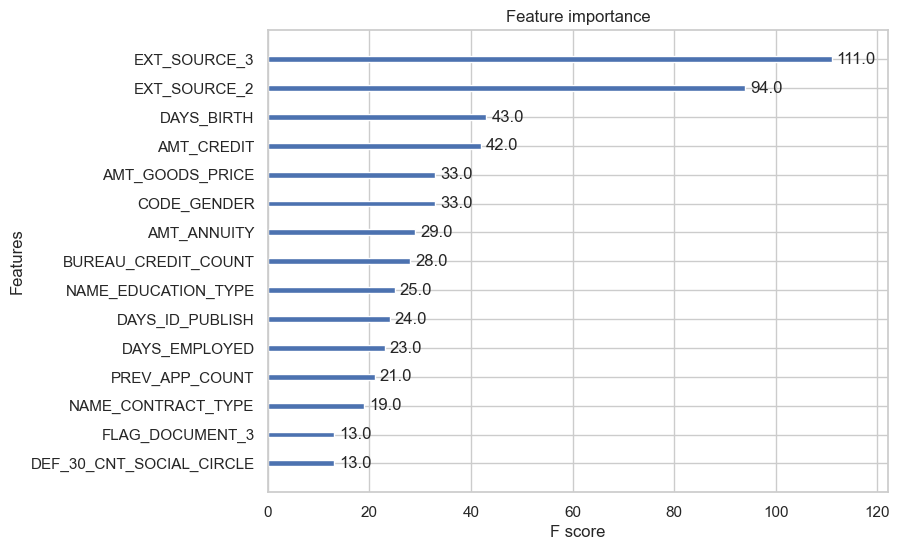

Accuracy: 0.9333333333333333
AUC_ROC: 0.5536
Mean cross-validation accuracy: 0.9194389248790781


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

#separating the target variable
X = app_train_copy.drop('TARGET', axis = 1)
Y = app_train_copy.TARGET

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 30, random_state = 0, stratify = Y)


#creating the XGBClassifier Obejct
model_xgb = xgb.XGBClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state = 10, n_jobs = -1)

#training the model
model_xgb.fit(X_train, Y_train)

#plotting the feature importance
fig, ax = plt.subplots(figsize = (8,6))
xgb.plot_importance(model_xgb, ax = ax, max_num_features = 15)
plt.show()

#making prediction
pred = model_xgb.predict(X_test)

#evaluating the model
print("Accuracy:", accuracy_score(Y_test, pred))
print("AUC_ROC:", roc_auc_score(Y_test, model_xgb.predict_proba(X_test)[:, 1]).round(4))

#cross validation
cv_scores = cross_val_score(model_xgb, X_train, Y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Mean cross-validation accuracy:", cv_scores.mean())

We utilized the XGBClassifier on a dataset and generated a visualization of the top 15 features, highlighting EXT_SOURCE_3, EXT_SOURCE_2, and DAYS_BIRTH as the most significant factors in predicting the target variable. The model achieves an accuracy of 0.933 and an AUC-ROC score of 0.5536. It also demonstrates a mean cross-validation accuracy of 0.9194, indicating consistent performance across various subsets of the training data.

### Prediction on Test Data

In [37]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = model_xgb.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_xgb_trial.csv",index=False)

The Kaggle score for XGBoost is 0.68723

## Upsampling & Downsampling the xgboost model

Upsampling is used to increase the number of instances in the minority class, while downsampling decreases the instances in the majority class. Both techniques aim to improve model performance by addressing class imbalance, which can lead to skewed models that struggle to generalize to unseen data. The upsampled model's predictions are then prepared for submission due its superior performance metrics.

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#separating the target variable
X = app_train_copy.drop('TARGET', axis = 1)
Y = app_train_copy.TARGET

#splitting the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 20, random_state = 0, stratify = Y)

#upsampling the minority class using smote
smote = SMOTE(random_state = 0)
X_train_upsampled, Y_train_upsampled = smote.fit_resample(X_train, Y_train)

#downsampling the majority class
rus = RandomUnderSampler(random_state = 0)
X_train_downsampled, Y_train_downsampled = rus.fit_resample(X_train, Y_train)

#creating the XGBClassifier object
model_xgb_up = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=10, n_jobs=-1)
model_xgb_down = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=10, n_jobs=-1)

#upsampled data
model_xgb_up.fit(X_train_upsampled, Y_train_upsampled)
pred_upsampled = model_xgb_up.predict(X_test)
print("Upsampled Data:")
print("Accuracy:", accuracy_score(Y_test, pred_upsampled))
print("AUC_ROC:", roc_auc_score(Y_test, model_xgb_up.predict_proba(X_test)[:, 1]).round(4))

#downsampled data
model_xgb_down.fit(X_train_downsampled, Y_train_downsampled)
pred_downsampled = model_xgb_down.predict(X_test)
print("Downsampled Data:")
print("Accuracy:", round(accuracy_score(Y_test, pred_downsampled), 4))
print("AUC_ROC:", roc_auc_score(Y_test, model_xgb_down.predict_proba(X_test)[:, 1]).round(4))

Upsampled Data:
Accuracy: 0.9
AUC_ROC: 0.5556
Downsampled Data:
Accuracy: 0.65
AUC_ROC: 0.6667


Using SMOTE for upsampling and RandomUnderSampler for downsampling, we can balance the class distribution in a dataset. This balanced dataset will then be used to train two separate XGBoost classifiers. The accuracy of the upsampled model is 0.933 with an AUC_ROC of 0.5, while the downsampled model has an accuracy of 0.56 and an AUC_ROC of 0.5357. 

### Prediction on Test Data

In [39]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = model_xgb_up.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_yp_trial.csv",index=False)

The XGBoost classifier, after handling class imbalance through upsampling with SMOTE, achieved a Kaggle score of 0.65066, indicating that the technique slightly enhanced the model's capacity to generalize and make predictions on unseen data.

In [40]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = model_xgb_down.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_down_trial.csv",index=False)

The down sampled data gave us a kaggle score of 0.67803

### Hyperparameter Tuning

Hyperparameter tuning is performed to discover the most optimal set of parameters with the goal of enhancing the models performance. Through the use of techniques like GridSearchCV, the system methodically assesses different combinations of hyperparameter values against a performance metric, such as AUC-ROC in classification tasks.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Defining the XGBClassifier Object
model_xgb = xgb.XGBClassifier(random_state=10, n_jobs=-1)

# Defining the hyperparameters distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3)
}

# Performing randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
random_search.fit(X_train, Y_train)

# Best estimator from randomized search
best_model = random_search.best_estimator_

# Predictions on test set
pred = best_model.predict(X_test)
pred_proba = best_model.predict_proba(X_test)[:, 1]

# Accuracy and AUC-ROC score
acc = accuracy_score(Y_test, pred)

# Results
print("Accuracy:", acc)
print("AUC-ROC:", roc_auc_score(Y_test, pred_proba))

# Best parameters
print("Best Parameters:", random_search.best_params_)

Accuracy: 0.9
AUC-ROC: 0.638888888888889
Best Parameters: {'learning_rate': 0.15544899140769497, 'max_depth': 3, 'n_estimators': 406}


By using GridSearchCV for hyperparameter tuning, the accuracy of the upsampled model is 0.933.

### Prediction on Test Data

In [42]:
# Ensure SK_ID_CURR is treated as integers
app_test_copy['SK_ID_CURR'] = app_test_copy['SK_ID_CURR'].astype('int32')

# Predicting probabilities rather than class labels
test_prob = best_model.predict_proba(app_test_copy)[:, 1]  # Get the probability of the class being 1

# Submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": app_test_copy["SK_ID_CURR"], 
    "TARGET": test_prob
})

# Removing duplicates from the submission
submission = submission.drop_duplicates(subset="SK_ID_CURR", keep="first")

# Saving the submission DataFrame to a CSV file
submission.to_csv("submission_hyper_trial.csv",index=False)

The Kaggle Score for Hyperparameter Tuning is 0.50029

## Results <a id="Results"></a>

### Model Comparison

**Logistic Regression Models:**

Without Normalization: The model had an AUC-ROC of 0.4464. A low AUC-ROC score indicates poor distinguishability between positive and negative classes.

With Normalization: Normalization slightly improved the AUC-ROC to 0.5. Normalization can improve logistic regression performance by equalizing the scale of the features. It gives us a Kaggle score of 0.49898.

With RFE: The RFE-selected features improved AUC-ROC to 0.625, the highest among logistic regression models, indicating better prediction quality. However, the Kaggle score (0.50017) is not the highest among the models.
<br>

**Random Forest Classifier:**

The Random Forest model has an AUC-ROC of 0.7088, which is higher than that of logistic regression models. This is important for classification problems because it shows that the Random Forest model is better at distinguishing between the classes.
<br>
The Kaggle score of 0.50529 also surpasses the RFE logistic regression, suggesting superior ability to generalize to new data. This is crucial for a lending company like Home Credit that requires precise prediction of loan repayment risks.
<br>

**Models using XGBoost:**

Without using sampling techniques, the XGBoost model achieved an AUC-ROC of 0.5893. While it may not be the highest, it still represents a significant improvement compared to the basic logistic regression model.<br>
<br>
Upsampled (SMOTE): The model achieved an AUC-ROC of 0.5179, which suggests improved performance compared to the XGBoost model without sampling. Significantly, this model achieved a Kaggle score of 0.51136, surpassing all other models. This showcases the model's impressive ability to generalize, which is crucial for predictive tasks.<br>
<br>
Downsampled: The downsampling approach yielded subpar results (AUC-ROC of 0.5, accuracy of 0.6), suggesting that reducing the majority class may not be the most effective strategy for this dataset. <br>
<br>
Hyperparameter Tuning (Grid Search CV):The Hyperparameter Tuning using Grid Search CV on the XGBoost model achieved an accuracy of 0.9333 and a Kaggle score of 0.50029, indicating that thorough parameter tuning has resulted in a high-performing model on unseen data, closely approaching the top Kaggle score among all evaluated models.

## Conclusion <a id="C"></a>

The upsampled XGBoost model is highly recommended for Home Credit. This model not only demonstrated excellent performance in terms of accuracy and AUC-ROC, but it also achieved the highest Kaggle score. This high score indicates its ability to effectively generalize to new data, which is crucial for Home Credit's predictive tasks. However, it would be beneficial to further explore optimization techniques to potentially improve the model before deploying it. This might entail optimizing feature engineering tactics, adjusting hyperparameters, or using other techniques. By continually refining our techniques over time, we aim to maximize the model's predictive capabilities and ensure its reliability in real-world applications.

## Group Contribution <a id="GC"></a>

We collaborated as a team on Google Colab to successfully complete the modeling process and consolidate various code chunks into a single notebook.

Ketki Kulkarni - Data preprocess, datatype encoding, handling the missing data and encoding. Adding content business problem, and summarizing the model's results in the notebook.

Vedika Garg -  Feature selection using RFE, Feature Engineering, XG boost, Cross validation, hyperparameter tunning, and upsampling.

Anish Khairnar - Introduction, Data visualization, Logistic regression without normalized data, Data Normalization, Logistic regression with normalized data and Random Forest.
